In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [2]:
data_2010s = pd.read_csv('dataset/dataset-of-10s.csv')
data_2000s = pd.read_csv('dataset/dataset-of-00s.csv')
data_1990s = pd.read_csv('dataset/dataset-of-90s.csv')
data_1980s = pd.read_csv('dataset/dataset-of-80s.csv')

In [3]:
data_2010s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [4]:
data_2000s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [5]:
data_1990s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [6]:
data_1980s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [7]:
data_2010s["year"] = 2010
data_2000s["year"] = 2000
data_1990s["year"] = 1990
data_1980s["year"] = 1980

In [8]:
df_list = [data_2010s, data_2000s, data_1990s, data_1980s]
data = pd.concat(df_list)

In [9]:
data["duration_s"] = data["duration_ms"]/1000

In [10]:
data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'year', 'duration_s'],
      dtype='object')

In [11]:
data_description = data.describe()

In [12]:
hits = data[data["target"] == 1]
flop = data[data["target"] == 0]

In [13]:
hits_description = hits.describe()
flop_description = flop.describe()

In [14]:
var_list = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit', 'duration_s']

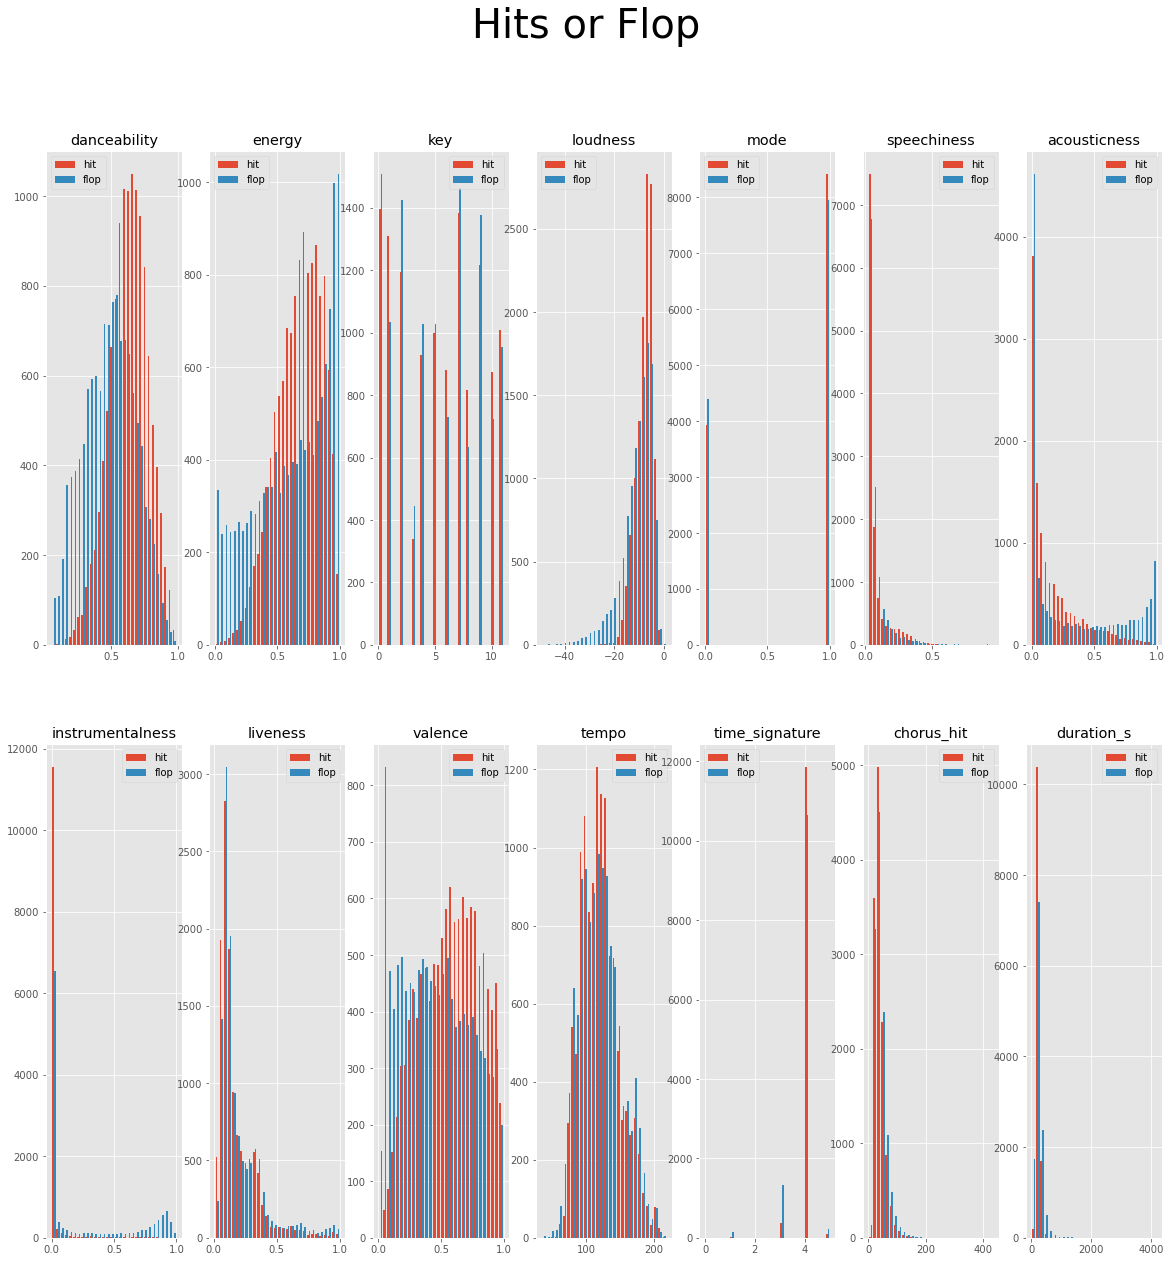

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 7, figsize=(20, 20))
fig.suptitle('Hits or Flop', fontsize=40)

column_idx = 0
for i in range(2):
    for j in range(7):
        ax[i][j].hist([hits[var_list[column_idx]], flop[var_list[column_idx]]], bins=30, label=['hit', 'flop'])
        ax[i][j].set_title(var_list[column_idx])
        ax[i][j].legend()
        column_idx += 1
        
plt.savefig('image.png', facecolor='white')

In [16]:
h = 24
s = 0.99
v = 1
 
colors = [
    mcl.hsv_to_rgb((h/360,0,v)),
    mcl.hsv_to_rgb((h/360,0.5,v)),
    mcl.hsv_to_rgb((h/360,1,v))
]
cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=3)

In [17]:
data_corr = data.drop(['duration_ms'], axis=1)

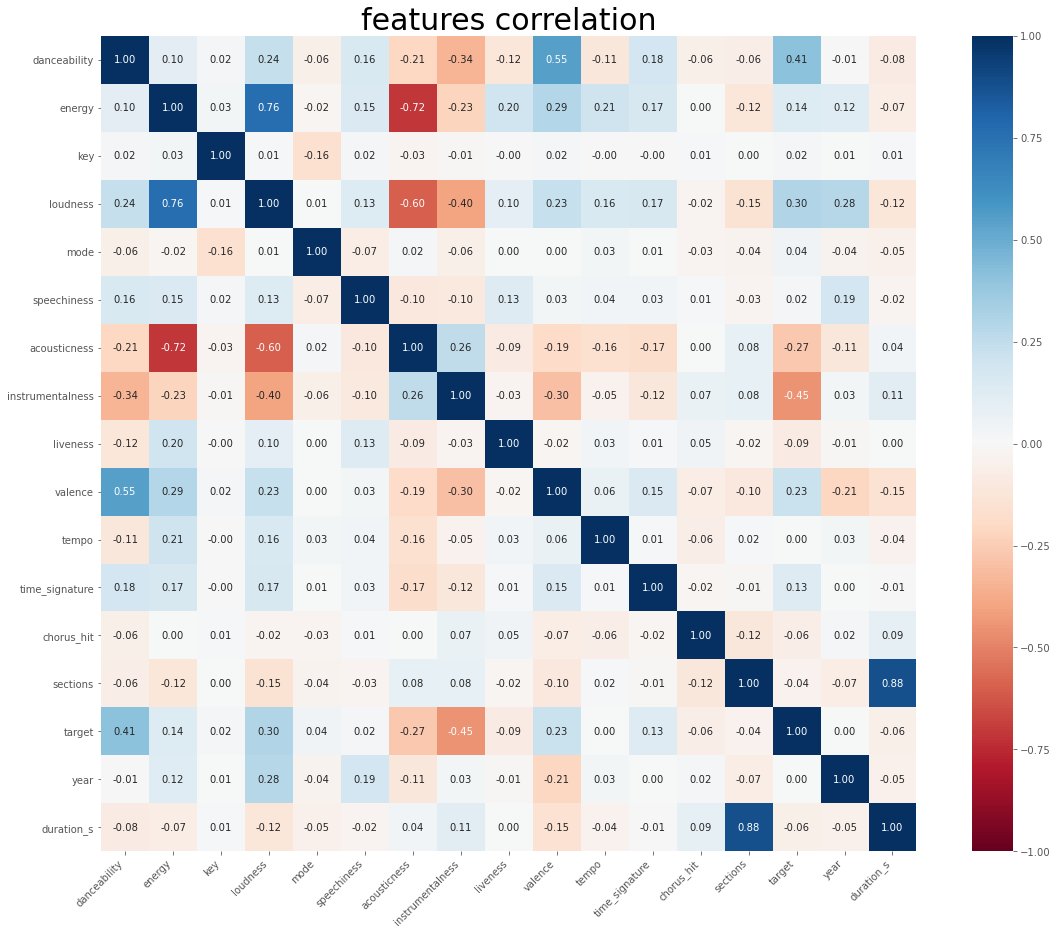

In [18]:
corr = data_corr.corr()
# plt.style.use('ggplot')
plt.figure(figsize=(20, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, cmap='RdBu', annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('features correlation', fontsize=30)
plt.show();

In [19]:
# boxplot or violinplot 그리기

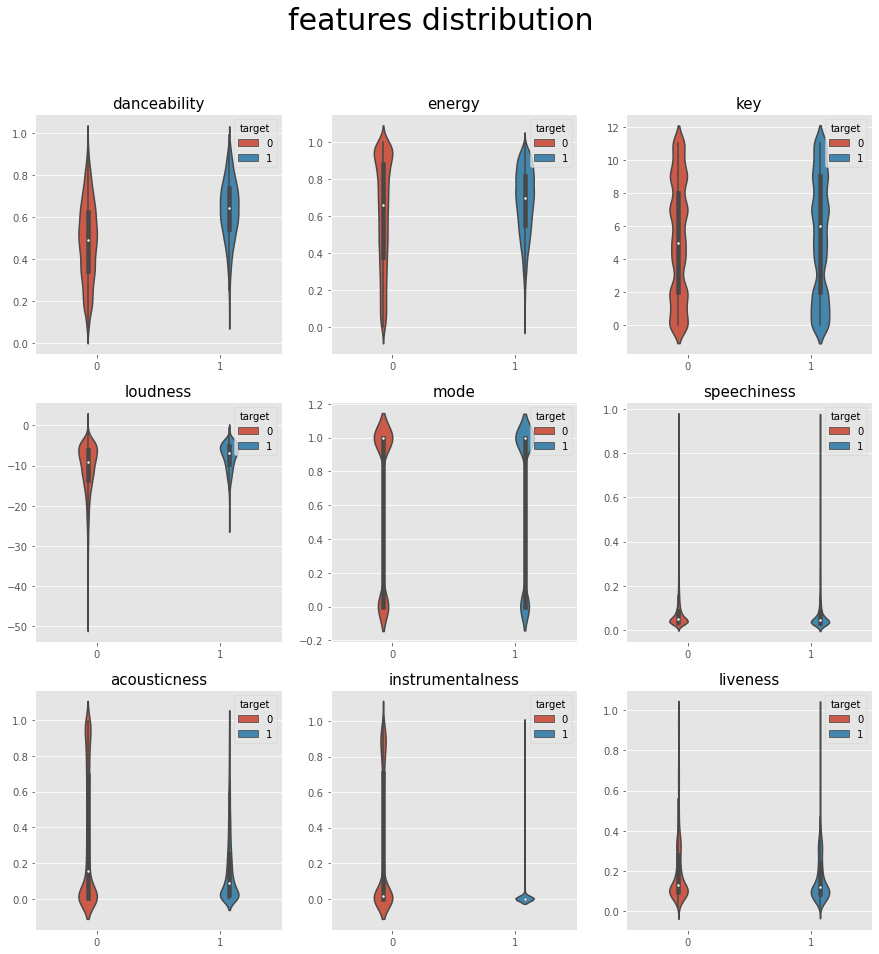

In [20]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
fig.suptitle('features distribution', fontsize = 30)
# plt.style.use('ggplot')

column_idx = 0
for i in range(3):
  for j in range(3):
    sns.violinplot(x = data['target'], y = data[var_list[column_idx]], hue = data['target'], notch = True, width = 0.3, ax = axes[i][j]).set_title(var_list[column_idx], fontsize = 15)
    axes[i][j].set_xlabel('')
    axes[i][j].set_ylabel('')
    column_idx += 1

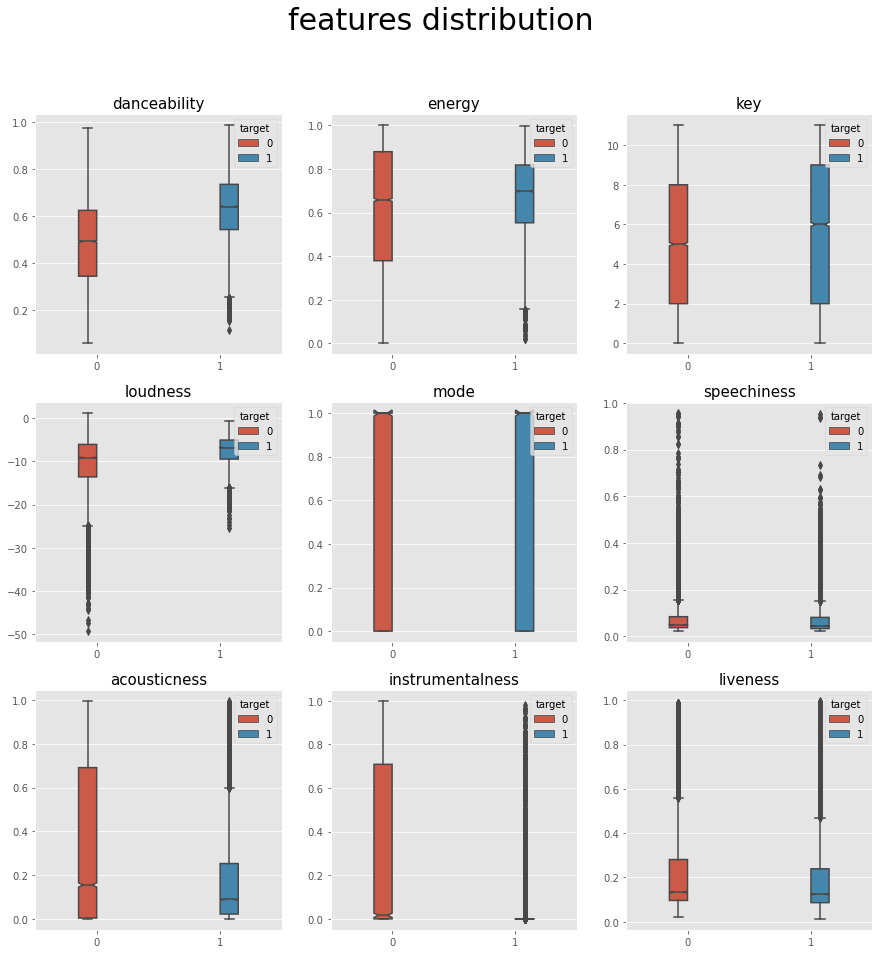

In [21]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
fig.suptitle('features distribution', fontsize = 30)
# plt.style.use('ggplot')

column_idx = 0
for i in range(3):
  for j in range(3):
    sns.boxplot(x = data['target'], y = data[var_list[column_idx]], hue = data['target'], notch = True, width = 0.3, ax = axes[i][j]).set_title(var_list[column_idx], fontsize = 15)
    axes[i][j].set_xlabel('')
    axes[i][j].set_ylabel('')
    column_idx += 1

In [22]:
# 가수 이름 전처리

In [23]:
artist_hits= hits.groupby('artist')['track'].agg(len).sort_values(ascending = False)

In [24]:
hits.groupby('artist')['track'].agg(len).sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:xlabel='artist'>

ValueError: 
Pitbull Featuring Trina & Young Bo$$
                                  ^
Expected end of text, found '$'  (at char 34), (line:1, col:35)

<Figure size 432x288 with 1 Axes>

In [25]:
hits_copy = hits.copy()

In [27]:
data_copy = data.copy() 

In [36]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 6907
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             24698 non-null  object 
 1   artist            24698 non-null  object 
 2   uri               24698 non-null  object 
 3   danceability      24698 non-null  float64
 4   energy            24698 non-null  float64
 5   key               24698 non-null  int64  
 6   loudness          24698 non-null  float64
 7   mode              24698 non-null  int64  
 8   speechiness       24698 non-null  float64
 9   acousticness      24698 non-null  float64
 10  instrumentalness  24698 non-null  float64
 11  liveness          24698 non-null  float64
 12  valence           24698 non-null  float64
 13  tempo             24698 non-null  float64
 14  duration_ms       24698 non-null  int64  
 15  time_signature    24698 non-null  int64  
 16  chorus_hit        24698 non-null  float64

In [44]:
data_copy['artist']= data_copy['artist'].apply(lambda x : x.replace('$', 's'))

In [50]:
hits_copy['artist']= hits_copy['artist'].apply(lambda x : x.replace('$', 's'))

In [73]:
hits_copy['artist'].value_counts(normalize=True)

Madonna                           0.004292
Taylor Swift                      0.004211
Glee Cast                         0.004211
Drake                             0.004130
Tim McGraw                        0.003644
                                    ...   
Steve Aoki & Louis Tomlinson      0.000081
David Guetta & Chris Willis       0.000081
Marshmello, Tyga & Chris Brown    0.000081
Ultravox                          0.000081
Nicki French                      0.000081
Name: artist, Length: 4934, dtype: float64

<AxesSubplot:>

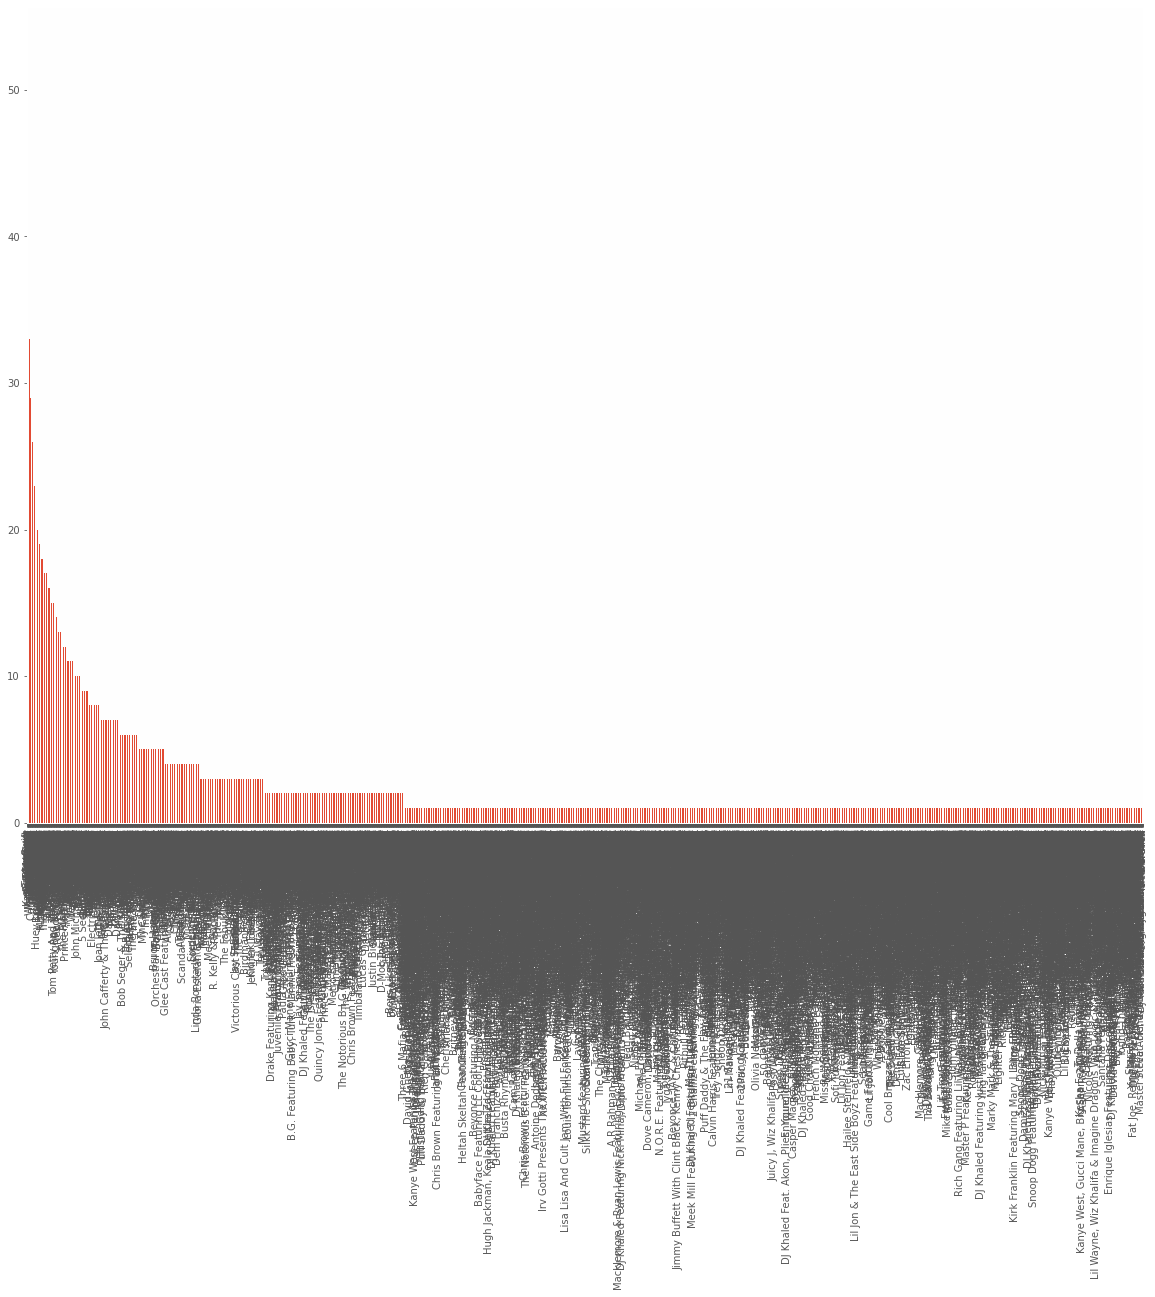

In [67]:
plt.figure(figsize=(20, 15))
hits_copy['artist'].value_counts().plot(kind='bar')

/Users/sol/miniforge3/envs/m1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='artist', ylabel='count'>

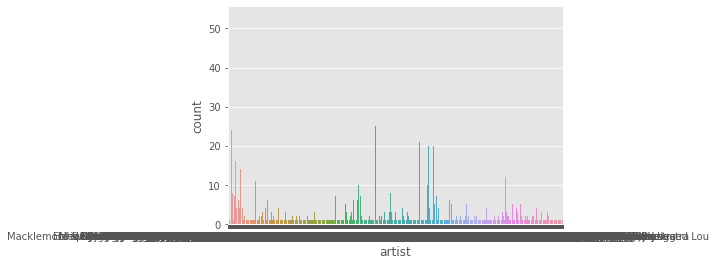

In [51]:
sns.countplot(hits_copy['artist']).

In [60]:
pd.set_option('display.max_seq_items', None)

In [62]:
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [74]:
# 섹션 eda

<AxesSubplot:xlabel='sections', ylabel='target'>

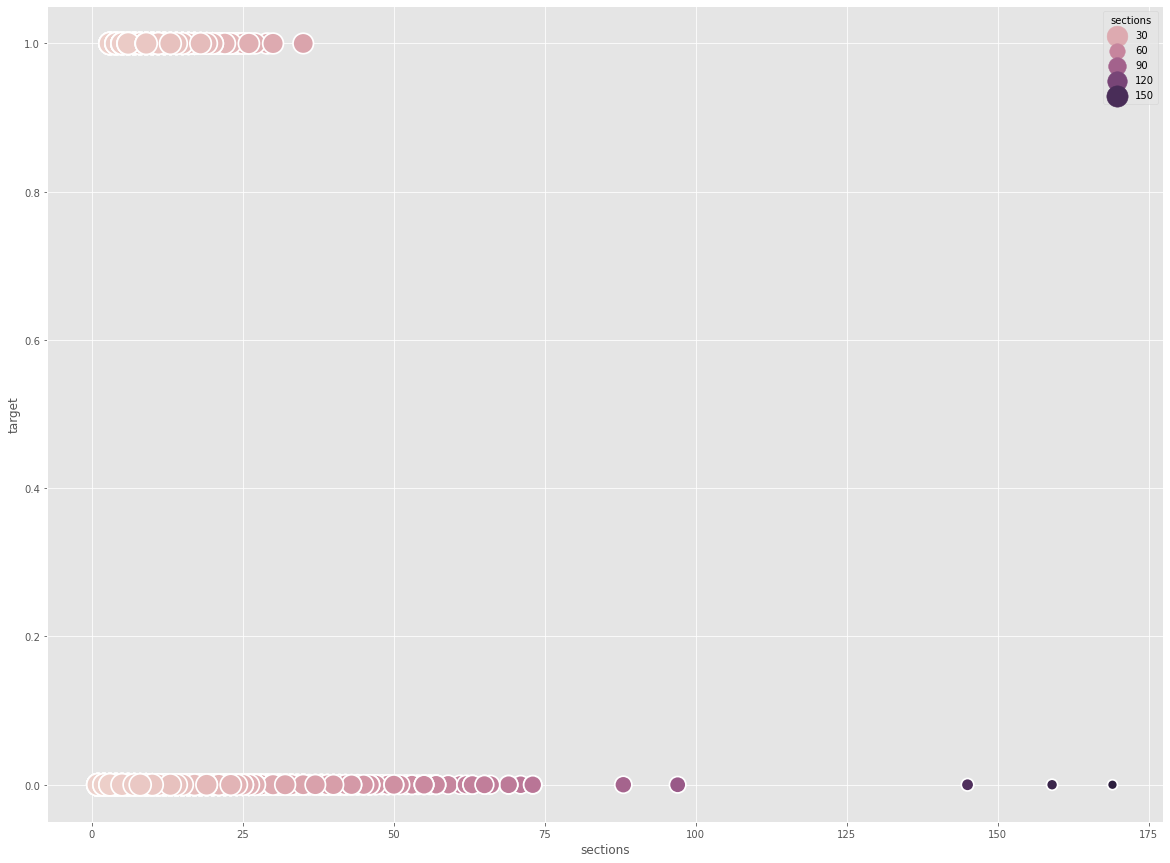

In [115]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x=data['sections'], y=data["target"], hue=data['sections'], size=data['sections'], sizes=(500,100))

In [89]:
sns.scatterplot

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [85]:
data[data['sections']==1].sections

4967    1
2891    1
3655    1
4817    1
221     1
2725    1
5860    1
Name: sections, dtype: int64